In [193]:
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.utils import resample

## Error functions

In [2]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# Exercise 1: OLS on the Franke function

## Make Franke function and plot

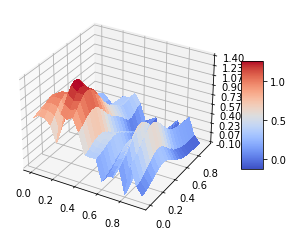

In [104]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = 0.2*np.random.randn(len(x))
    #noise = np.random.normal(0, 0.05, len(x)*len(x)) 
    return term1 + term2 + term3 + term4 + noise

z = FrankeFunction(x, y) 

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Make design matrix with polynomial degree n

In [66]:
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of columns in beta
    X = np.ones((N,l)) # matrix with N rows, l columns

    for i in range(1,n+1):
        q = int((i)*(i+1)/2) 
        for k in range(i+1): 
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

## OLS regression with polynomial degree 1-5

In [225]:
# Making meshgrid of datapoints and compute Franke's function
n = 5
N = 200
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)

z = FrankeFunction(x_flat, y_flat)

polydegree = np.zeros(n)
r2_train = np.zeros(n)
r2_test = np.zeros(n)
mse_train = np.zeros(n)
mse_test = np.zeros(n)

# OLS regression for polynomials from 1 to 5
for i in range(n):
    n = i+1
    polydegree[i] = n
    X = create_X(x_flat, y_flat, n)
    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    
    # scaling (Optional, no point in scaling since data is between 0 and 1)
    scaler = StandardScaler()
    X_train_scaled = X_train - np.mean(X_train) #scaler.fit_transform(X_train, z_train)
    X_test_scaled = X_test - np.mean(X_test) #scaler.transform(X_test)
    
    # prediction
    betaOLS = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train
    ztilde_train = X_train_scaled @ betaOLS
    ztilde_test = X_test_scaled @ betaOLS
    
    # errors
    r2_train[i] = r2_score(z_train, ztilde_train)
    r2_test[i] = r2_score(z_test, ztilde_test)
    mse_train[i] = mean_squared_error(z_train, ztilde_train) #MSE(z_train,ztilde_ols_train)
    mse_test[i] = mean_squared_error(z_test, ztilde_test)  #MSE(z_test,ztilde_ols_test)

## Plot error as function of complexity

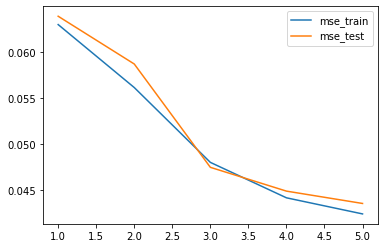

In [226]:
plt.plot(polydegree, mse_train, label='mse_train')
plt.plot(polydegree, mse_test, label='mse_test')
#plt.plot(polydegree, r2_train, label='r2_train')
#plt.plot(polydegree, r2_test, label='r2_test')
plt.legend()
plt.show()

## Make confidence intervals
- $\mu_{\beta} \pm \frac{2\sigma_{\beta}}{\sqrt{n}}$

[  0.37549656   8.05741926   4.31103818 -34.21749451 -15.98528382
 -11.58504268  46.37228774  46.58373433  22.357606    -0.8918076
 -20.64205044 -56.47356366  -7.27315327 -32.81601437  21.8160728
   0.18352732  20.22726764  10.80135241  -5.72281949  18.52332907
 -13.84927081]


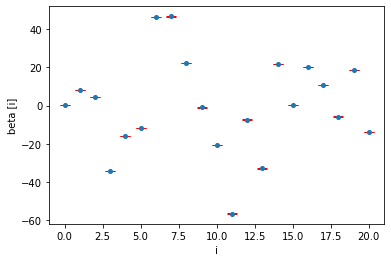

,Beta,+-
0,0.375497,0.001392
1,8.057419,0.015560
2,4.311038,0.016238
3,-34.217495,0.071937
4,-15.985284,0.060308
5,-11.585043,0.077245
6,46.372288,0.157383
7,46.583734,0.126655
8,22.357606,0.129682
9,-0.891808,0.171308


In [227]:
variance = np.zeros(len(betaOLS))
CI = np.zeros(len(betaOLS))

for i in range(len(betaOLS)):
    variance[i] = 0.1**2 * np.linalg.pinv(X_train_scaled.T @ X_train_scaled)[i,i]
    CI[i] = 2*np.sqrt(variance[i])/np.sqrt(N)
print(betaOLS)


pd.DataFrame(betaOLS, CI)

plt.errorbar(np.arange(0,len(betaOLS)), betaOLS, yerr=CI, fmt='o', ecolor='red', capsize=5, markersize=4)
plt.xlabel('i')
plt.ylabel('beta [i]')
plt.show()

table = pd.DataFrame({'Beta': betaOLS, '+-': CI})
table

# Exercise 2 - Bias-variance trade-off and resampling techniques

## OLS regression with bootstrap 

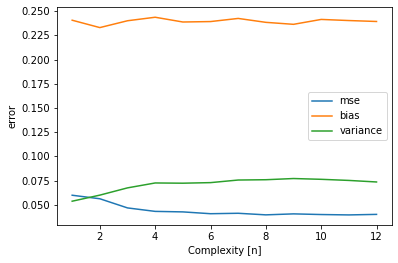

(8000,)


In [229]:
N = 200
n_bootstraps = 50
maxdegree = 12
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)

polydegree = np.zeros(maxdegree)
mse_error = np.zeros(maxdegree)
r2_error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)


z = FrankeFunction(x_flat, y_flat)

for i in range(maxdegree):
    degree = i+1
    print(degree)
    polydegree[i] = degree
    X = create_X(x_flat, y_flat, degree)
    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    X_train_scaled = X_train - np.mean(X_train)
    X_test_scaled = X_test - np.mean(X_test)
    
    mse_bs = np.zeros(n_bootstraps)
    bias_bs = np.zeros(n_bootstraps)
    variance_bs = np.zeros(n_bootstraps)
    for j in range(n_bootstraps):
        x_bs,z_bs = resample(X_train_scaled, z_train)
        beta = np.linalg.pinv(x_bs.T @ x_bs) @ x_bs.T @ z_bs
        z_pred = X_test_scaled @ beta
        
        mse_bs[j] = mean_squared_error(z_test,z_pred)
        bias_bs[j] = np.mean((z_test - np.mean(z_pred)**2))
        variance_bs[j] = np.mean((np.mean(z_pred) - z_pred)**2)
        
    mse_error[i] = np.mean(mse_bs)
    bias[i] = np.mean(bias_bs)
    variance[i] = np.mean(variance_bs)
    
    #z_test = z_test.reshape(-1,1)
    #mse_errors[i] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
    #biases[i] = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
    #variances[i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )
    
plt.plot(polydegree, mse_error, label='mse')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='variance')
plt.xlabel('Complexity [n]')
plt.ylabel('error')
plt.legend()
plt.show()
print(z_pred.shape)

## Discussion on bias-variance trade-off

- Varier polynomgrad n, punkter N og antall bootstraps n_bootstraps og diskuter forskjellene


# Exercise 3 - cross validation as resampling technique, adding more complexity

In [233]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

N = 100
degree = 5
k = 10
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)
mse_scores = np.zeros(k)

z = FrankeFunction(x_flat, y_flat)
X = create_X(x_flat, y_flat, degree)

kfold = KFold(n_splits = k)
i = 0
for train_indexes, test_indexes in kfold.split(X):
    #print(train_indexes)

    X_train = X[train_indexes]
    X_test = X[test_indexes]
    z_train = z[train_indexes]
    z_test = z[test_indexes]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train, z_train)
    X_test_scaled = scaler.transform(X_test)

    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
    z_pred = X_test @ beta
    mse_scores[i] = mean_squared_error(z_test, z_pred)
    #print(mse_scores[i])

print(np.mean(mse_scores))

0.004850678374230294


## CV with scikit cross_val_score

In [234]:
linreg = LinearRegression()
mse_scikit_linreg = cross_val_score(linreg, X, z, scoring='neg_mean_squared_error', cv=kfold)


print(np.mean(mse_scikit_linreg))

-0.04548555920561886
